In [1]:
#Predicting house prices using Linear Regression and GBR. The tutorial and write up for the code can be found here https://medium.com/towards-data-science/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [4]:
HDB = pd.read_csv("/Users/paulinekoh/Desktop/DataScience/Project/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-march-2012-onwards.csv", index_col='month', parse_dates=True)

In [5]:
HDB.head(18)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
month,,,,,,,,,
2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
2012-03-01,ANG MO KIO,3 ROOM,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0
2012-03-01,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0
2012-03-01,ANG MO KIO,3 ROOM,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0
2012-03-01,ANG MO KIO,3 ROOM,476,ANG MO KIO AVE 10,11 TO 15,67.0,New Generation,1979,328000.0


In [6]:
# create a new column for Price per sqm
HDB['resale_price_per_sqm'] = HDB.resale_price / HDB.floor_area_sqm
HDB.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_price_per_sqm
month,,,,,,,,,,
2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,5555.555556
2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,6022.727273
2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,4632.352941
2012-03-01,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,4776.119403
2012-03-01,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,4791.044776


In [7]:
# remove the block column
HDB.drop('block', axis=1, inplace=True)

In [8]:
# remove the street_name column
HDB.drop('street_name', axis=1, inplace=True)

In [9]:
# map categorical data to numeric data
HDB['flat_type_num'] = HDB.flat_type.map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7})

In [10]:
# map categorical data to numeric data
HDB['flat_type_num'] = HDB.flat_type.map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7})

In [11]:
HDB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102100 entries, 2012-03-01 to 2017-07-01
Data columns (total 9 columns):
town                    102100 non-null object
flat_type               102100 non-null object
storey_range            102100 non-null object
floor_area_sqm          102100 non-null float64
flat_model              102100 non-null object
lease_commence_date     102100 non-null int64
resale_price            102100 non-null float64
resale_price_per_sqm    102100 non-null float64
flat_type_num           102100 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 10.3+ MB


What are the average Floor Area Sqm, Lease commence_date and Resale_Price?

In [12]:
HDB.groupby('town').mean()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num
town,,,,,
ANG MO KIO,82.102712,1981.983646,418629.835860,5063.686140,3.481053
BEDOK,87.164290,1983.121663,420083.763501,4837.048070,3.739836
BISHAN,105.579641,1989.078059,603194.968755,5708.664891,4.332806
BUKIT BATOK,91.578386,1988.440998,406086.975042,4439.294708,3.840804
BUKIT MERAH,84.999502,1987.553536,549422.586624,6428.789365,3.688496
BUKIT PANJANG,104.700730,1995.901179,436063.313869,4175.279812,4.412409
BUKIT TIMAH,107.859091,1983.163636,686751.436364,6342.467316,4.409091
CENTRAL AREA,79.230860,1989.444052,594591.738516,7365.396072,3.553592
CHOA CHU KANG,111.090741,1995.334954,424124.816843,3825.065295,4.482407


In [13]:
HDB.groupby('flat_type').mean()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num
flat_type,,,,,
1 ROOM,31.000000,1975.000000,222661.016949,7182.613450,1.0
2 ROOM,45.454376,1979.084730,259146.787709,5724.624586,2.0
3 ROOM,68.219060,1981.030000,338317.520624,4976.865864,3.0
4 ROOM,96.012468,1993.427552,447501.736135,4692.966447,4.0
5 ROOM,118.534178,1995.683519,535919.387414,4532.330189,5.0
EXECUTIVE,143.841397,1994.107980,633405.516678,4405.971923,6.0
MULTI-GENERATION,157.846154,1987.153846,769418.769231,4889.045202,7.0


In [14]:
HDB.describe()

,floor_area_sqm,lease_commence_date,resale_price,resale_price_per_sqm,flat_type_num
count,102100.000000,102100.000000,1.021000e+05,102100.000000,102100.000000
mean,96.617284,1990.358364,4.498540e+05,4725.349432,4.085436
std,24.584306,10.639069,1.310726e+05,1006.667181,0.931864
min,31.000000,1966.000000,1.750000e+05,2375.000000,1.000000
25%,74.000000,1983.000000,3.550000e+05,4047.619048,3.000000
50%,95.000000,1988.000000,4.250000e+05,4527.027027,4.000000
75%,111.000000,1999.000000,5.150000e+05,5142.857143,5.000000
max,280.000000,2015.000000,1.180000e+06,10645.161290,7.000000


In [15]:
HDB[['resale_price','town']].groupby('town').resale_price.mean().sort_values(ascending=False).head(5)

town
BUKIT TIMAH      686751.436364
BISHAN           603194.968755
CENTRAL AREA     594591.738516
BUKIT MERAH      549422.586624
MARINE PARADE    548716.566761
Name: resale_price, dtype: float64

In [16]:
# count the number of HDB sold in each town
HDB.town.value_counts()

JURONG WEST        8270
WOODLANDS          8042
TAMPINES           7323
SENGKANG           6668
BEDOK              6592
YISHUN             6538
HOUGANG            5216
ANG MO KIO         5014
CHOA CHU KANG      4320
BUKIT BATOK        4127
BUKIT MERAH        4016
PUNGGOL            3701
BUKIT PANJANG      3562
PASIR RIS          3379
TOA PAYOH          3236
KALLANG/WHAMPOA    3098
GEYLANG            2888
QUEENSTOWN         2767
SEMBAWANG          2566
CLEMENTI           2526
JURONG EAST        2337
SERANGOON          2245
BISHAN             1896
CENTRAL AREA        849
MARINE PARADE       704
BUKIT TIMAH         220
Name: town, dtype: int64

In [17]:
# count the number of HDB sold in each town
HDB.flat_type.value_counts()

4 ROOM              40657
3 ROOM              28667
5 ROOM              23597
EXECUTIVE            8020
2 ROOM               1074
1 ROOM                 59
MULTI-GENERATION       26
Name: flat_type, dtype: int64

In [18]:
# compare with line plot
HDB.month.value_counts().sort_index().plot()

AttributeError: 'DataFrame' object has no attribute 'month'

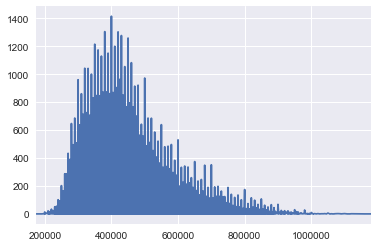

In [19]:
# compare with line plot
HDB.resale_price.value_counts().sort_index().plot()

<function seaborn.utils.despine>

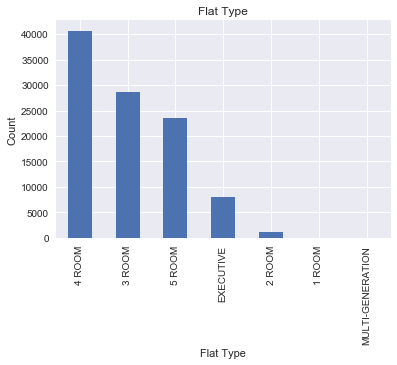

In [20]:
HDB['flat_type'].value_counts().plot(kind='bar')
plt.title('Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Count')
sns.despine

In [21]:
# limit to categorical data using df.select_dtypes()
HDB = HDB.select_dtypes(include=[object])
HDB.head(3)

,town,flat_type,storey_range,flat_model
month,,,,
2012-03-01,ANG MO KIO,2 ROOM,06 TO 10,Improved
2012-03-01,ANG MO KIO,2 ROOM,01 TO 05,Improved
2012-03-01,ANG MO KIO,3 ROOM,06 TO 10,New Generation


In [22]:
plt.scatter(HDB.resale_price_per_sqm,HDB.floor_area_sqm)
plt.title("Price vs Square Feet")

AttributeError: 'DataFrame' object has no attribute 'resale_price_per_sqm'

In [23]:
# Seaborn scatter plot with regression line
sns.lmplot(x='resale_price_per_sqm', y='floor_area_sqm', data=HDB, aspect=1.5, scatter_kws={'alpha':0.2})

KeyError: "['floor_area_sqm' 'resale_price_per_sqm'] not in index"

In [24]:
# correlation matrix (ranges from 1 to -1)
HDB.corr()

""


In [25]:
plt.scatter(data.resale_price,data.storey_range)
plt.title("Price vs Storey")

NameError: name 'data' is not defined

In [26]:
plt.scatter(data.town,data.resale_price)
plt.title("Which is the pricey location by zipcode?")

NameError: name 'data' is not defined